**Problem formulation**

We want to investigate what characteristics affect diabetes. 

Make prediction whether a patient has diabetes based on those characteristics 

Hence, our dependent variable y is Diabetes Prediction (Y/N) or whether or not a patient has diabetes 

**Importing packages**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import metrics

#For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')

**Loading the raw data**

In [ ]:
# loading the raw data 
df = pd.read_csv('diabetes.csv')

#printing the shape
print(df.shape)

#printing the first 5 rows 
df.head(5)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements. All patients in this dataset are females at least 21 years old of Pima Indian heritage. 

What are the features?
- **Pregnancies :** Number of times pregnant
- **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **Blood Pressure:** Diastolic blood pressure (mm Hg)
- **Skin Thickness:** Triceps skin fold thickness (mm)
- **Insulin:** 2-Hour serum insulin (mu U/ml)
- **BMI:** Body mass index (weight in kg/(height in m)^2)
- **Diabetes Pedigree Function:** Diabetes pedigree function
- **Age:** Age (years)

What is the response?
- **Outcome:** Class variable (0 or 1) 268 of 768 are 1, the others are 0

What else do we know?
- Because the response variable is discrete, this is a **classification** problem.
- There are 768 **observations** (represented by the rows), and each observation is a data of a patient.

**Data pre-processing**

In [ ]:
# checking for null values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Investigating all the elements in each column for unique values  

for column in df:
    unique_values = np.unique(df[column])
    num_values = len(unique_values)
    if num_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, num_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, num_values))

The number of values for feature Pregnancies is: 17
The number of values for feature Glucose is: 136
The number of values for feature BloodPressure is: 47
The number of values for feature SkinThickness is: 51
The number of values for feature Insulin is: 186
The number of values for feature BMI is: 248
The number of values for feature DiabetesPedigreeFunction is: 517
The number of values for feature Age is: 52
The number of values for feature Outcome is: 2 -- [0 1]


In [ ]:
# describing the data

df.describe().T # easy to interpret

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# checking the mean of the values depending on their category (0 or 1)

df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


This shows the mean age for people with no diabetes is 31 and the ones with diabetes is 37. Similarly, the mean BMI index of people without diabetes is 30 and with diabetes is 35, and so on 

In [ ]:
# checking the median of the values depending on their category (0 or 1)

df.groupby('Outcome').median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.0,107.0,70.0,21.0,39.0,30.05,0.336,27.0
1,4.0,140.0,74.0,27.0,0.0,34.25,0.449,36.0


In [ ]:
# to check about each feature

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies
Skew : 0.9


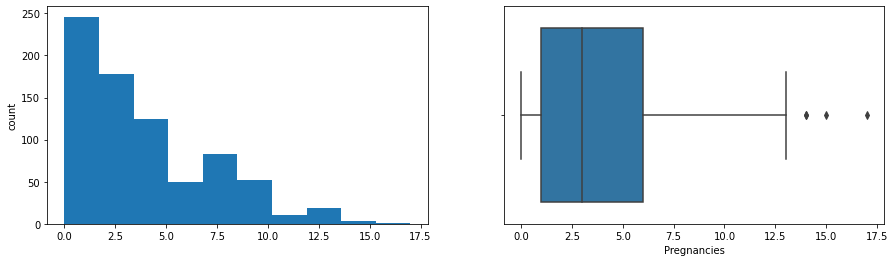

Glucose
Skew : 0.17


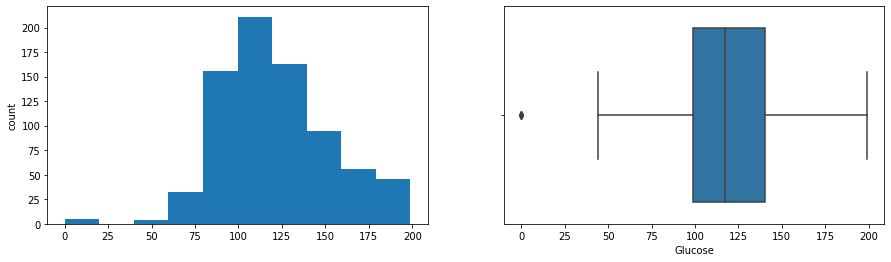

BloodPressure
Skew : -1.84


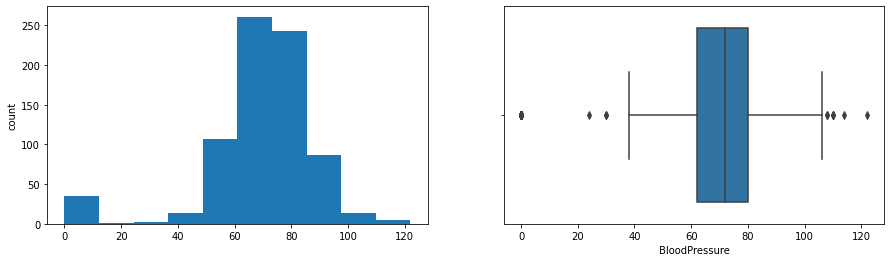

SkinThickness
Skew : 0.11


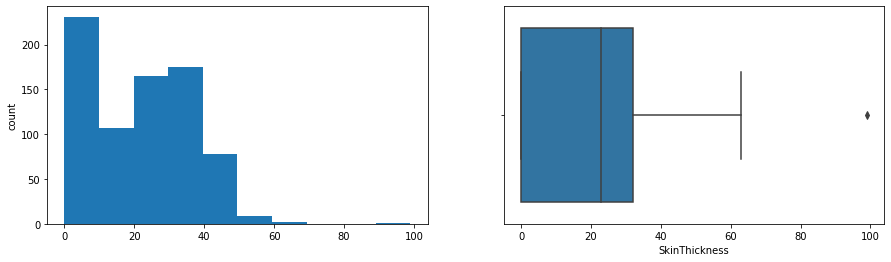

Insulin
Skew : 2.27


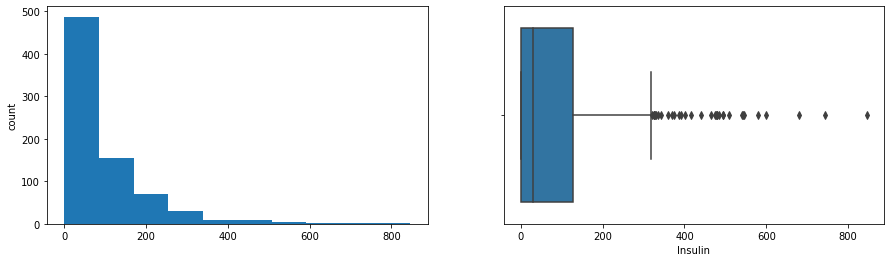

BMI
Skew : -0.43


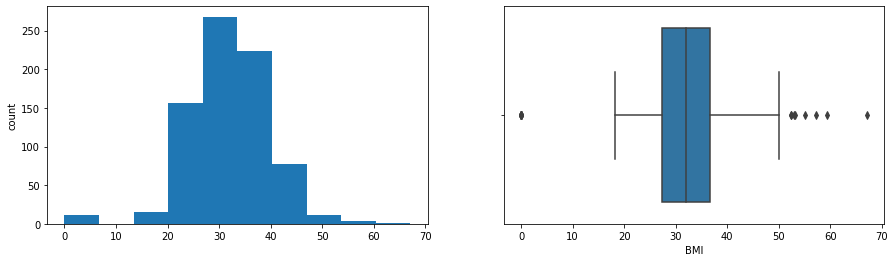

DiabetesPedigreeFunction
Skew : 1.92


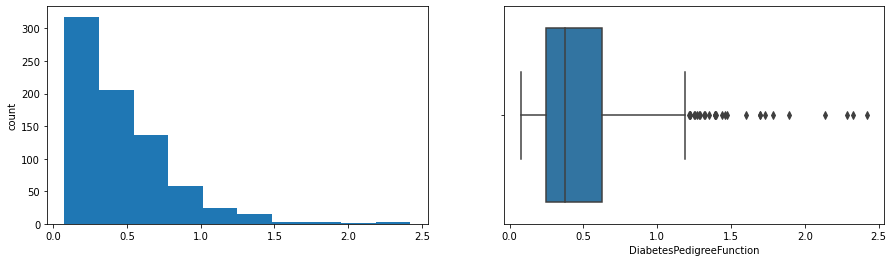

Age
Skew : 1.13


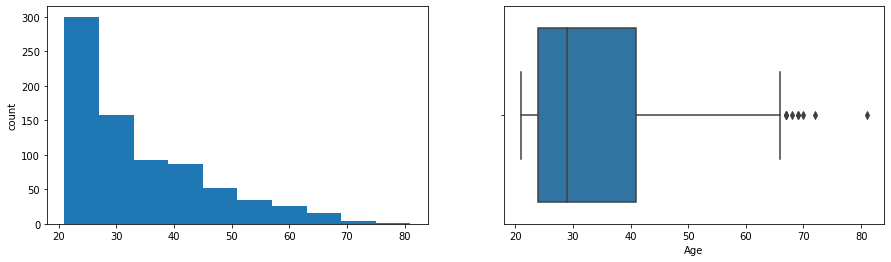

In [ ]:

# histogram plot of the frquency of our feature data columns

columns = [x for x in df.columns if x != 'Outcome']

for col in columns:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x = col , data = df)
    plt.show()

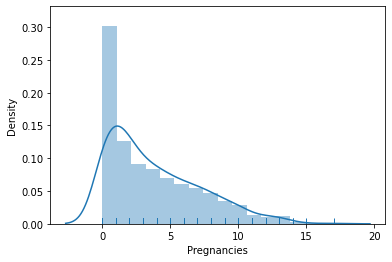

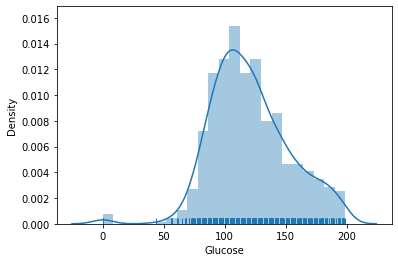

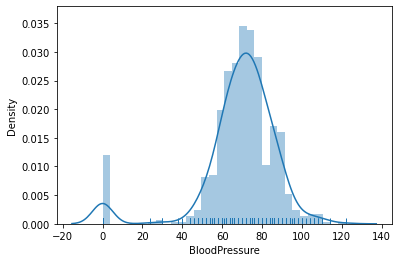

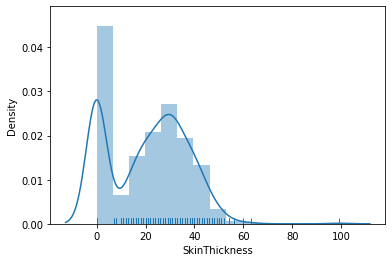

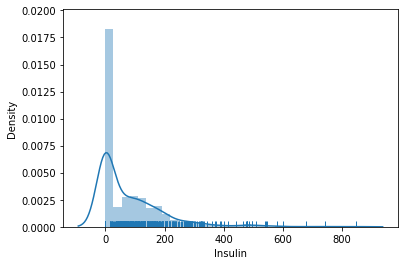

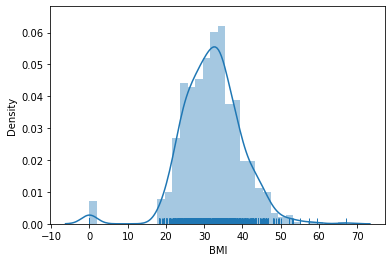

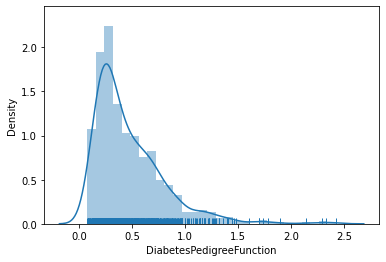

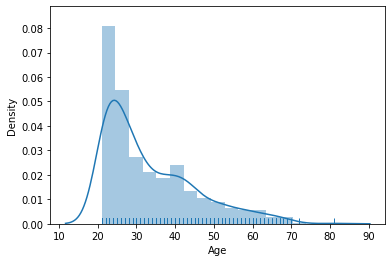

In [ ]:
# histogram plot of the frquency of our feature data columns

for i, col in enumerate(df.columns[:-1]):
  plt.figure(i)
  sns.distplot(df[col], rug = True)

We can see that Age, Diabetes Pedigree Function, Insulin, Skin Thickness is right skewed distribution. 

We can also see that glucose and blood pressure are slightly left skewed distribution. 

BMI has symmetric distribution. 

However, on the following columns, a value of zero does not make sense

1. Glucose (left)
2. Blood Pressure (left)
3. Skin Thickness (right)
4. Insulin (right)
5. BMI 

Hence, we need to clean the data as this is indicative of missing values 

Let us replace the 0 values with NaN to count the number of missing values 

In [ ]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


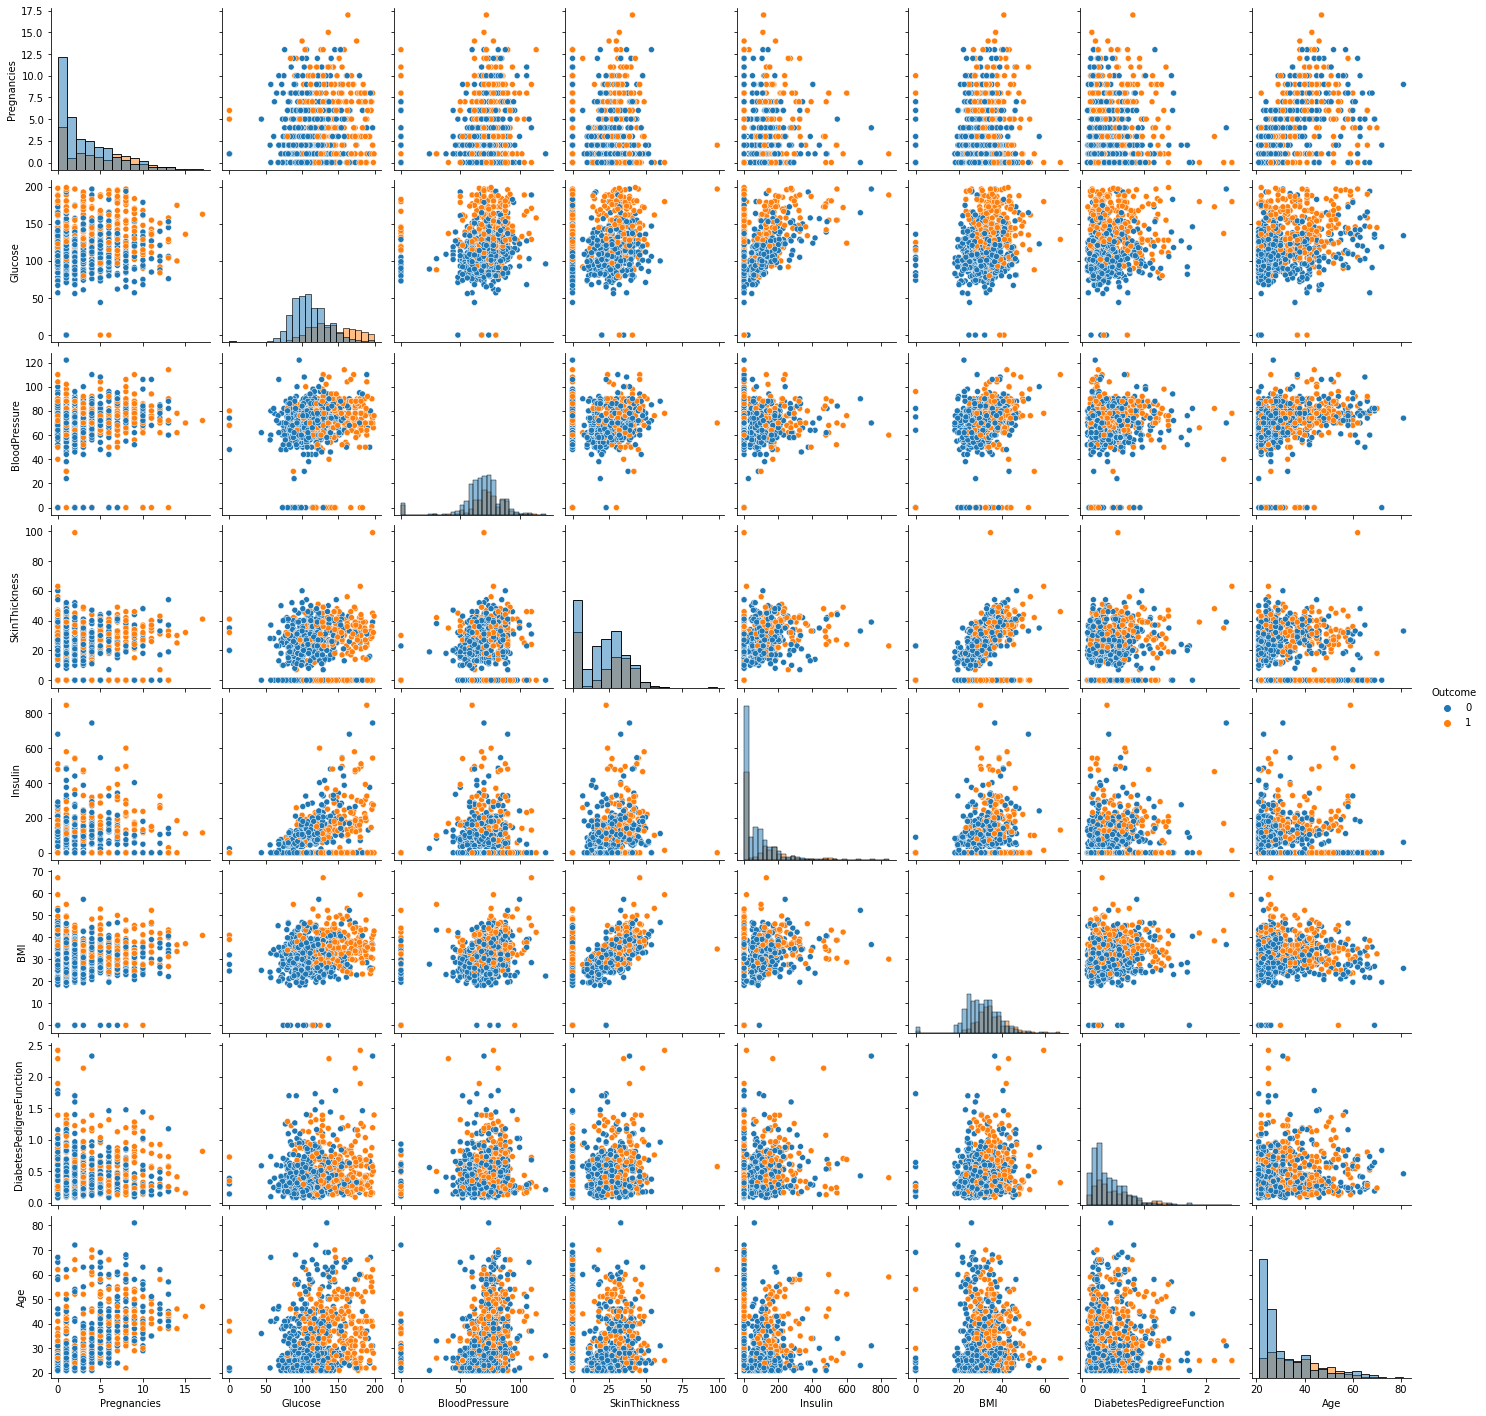

In [ ]:
# scattter matrix 

sns.pairplot(df, hue = 'Outcome', diag_kind = 'hist')

As we can see above, the blue color is for patients with no diabetes and the orange color is for people with diabetes 

Also, we can see a correlation between skin thickness and BMI 

We can see slight correlation between Diabetes Pedigree Function and Age, Insulin and Age, and Pregnancy and Age 

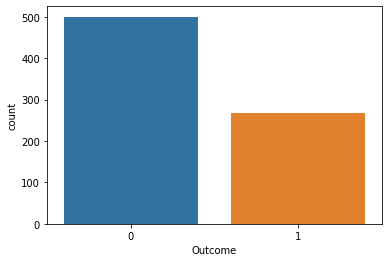

In [ ]:
## check the distribution of y variable

sns.countplot(df['Outcome']);

In [ ]:
X = df_copy.drop('Outcome', axis = 1)
y = df_copy['Outcome']

In [ ]:
# Train test Split

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , stratify=y , random_state=42)

In [ ]:
X_train.shape , y_train.shape

((576, 8), (576,))

In [ ]:
X_test.shape , y_test.shape

((192, 8), (192,))

**Cleaning the data**

In [ ]:
def fillnull(df_copy):
    df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)
    df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
    df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
    df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
    df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
    return df_copy
    

In [ ]:
print('Nulls before imputation in train : ' ,X_train.isnull().sum().sum())
X_train = fillnull(X_train)
print('Nulls after imputation in train : ' ,X_train.isnull().sum().sum())

Nulls before imputation in train :  475
Nulls after imputation in train :  0


In [ ]:
print('Nulls before imputation in test : ' ,X_test.isnull().sum().sum())
X_test = fillnull(X_test)
print('Nulls after imputation in test : ' ,X_test.isnull().sum().sum())

Nulls before imputation in test :  177
Nulls after imputation in test :  0


Checking the distribution aftter data cleaning 

Pregnancies
Skew : 0.89


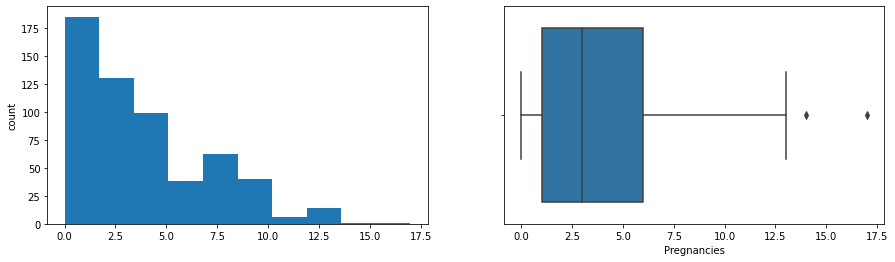

Glucose
Skew : 0.56


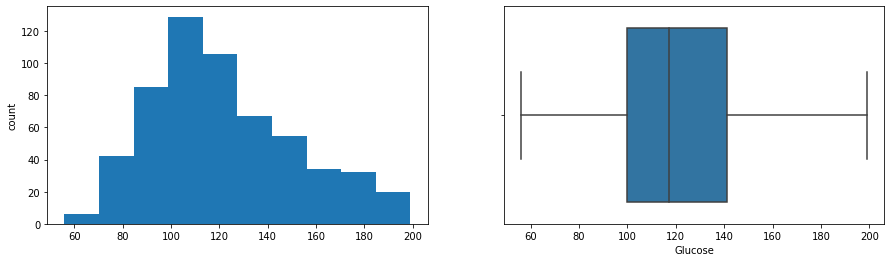

BloodPressure
Skew : 0.1


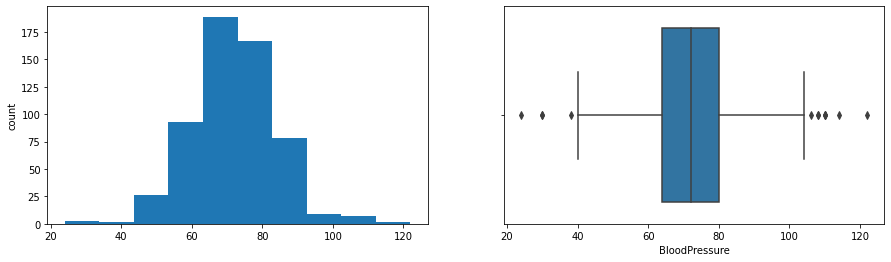

SkinThickness
Skew : 0.93


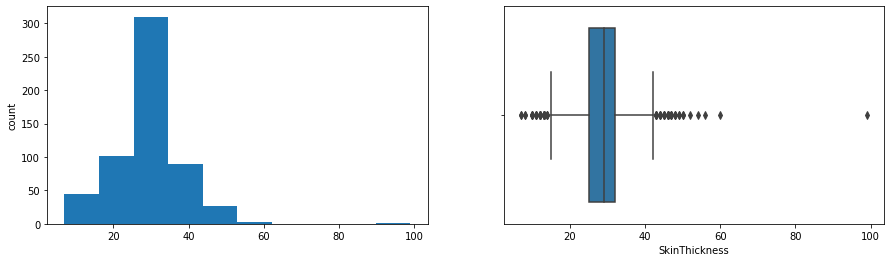

Insulin
Skew : 3.18


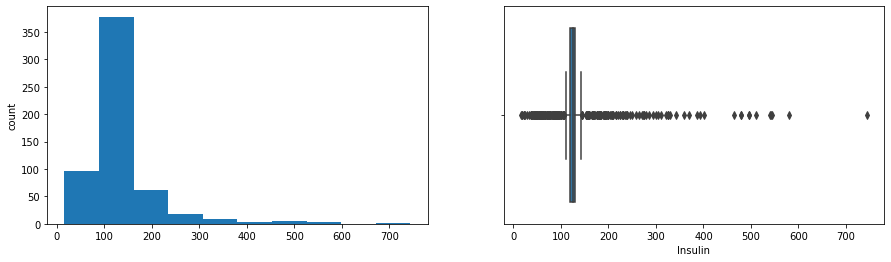

BMI
Skew : 0.61


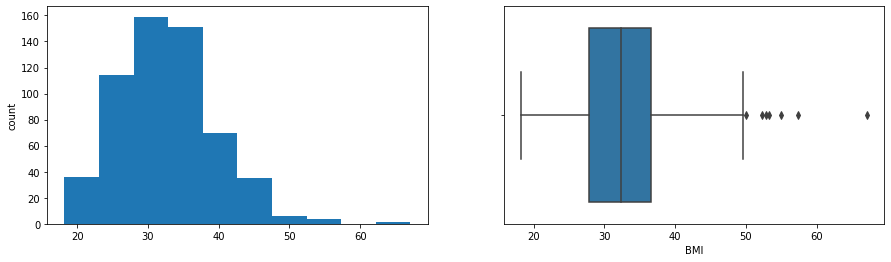

DiabetesPedigreeFunction
Skew : 1.81


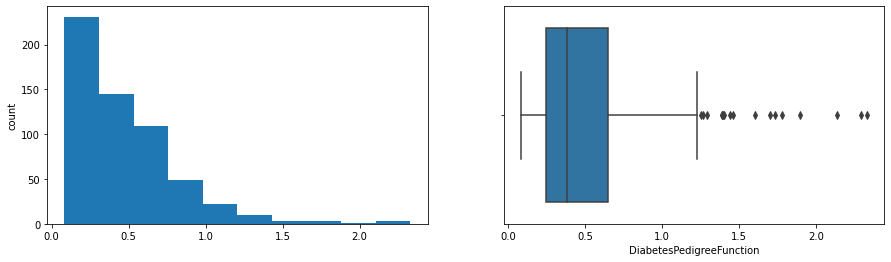

Age
Skew : 1.12


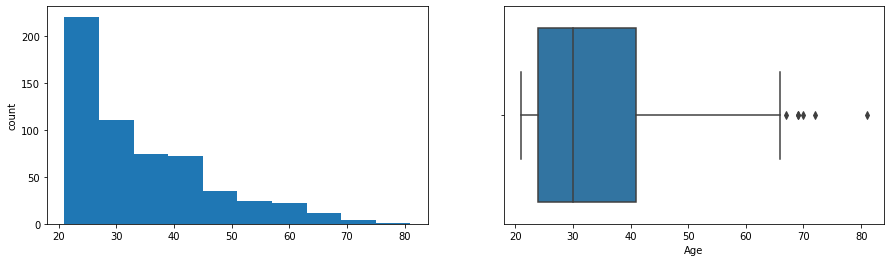

In [ ]:

# histogram plot of the frquency of our feature data columns

for col in X_train.columns:
    print(col)
    print('Skew :',round(X_train[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    X_train[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x = col , data = X_train)
    plt.show()

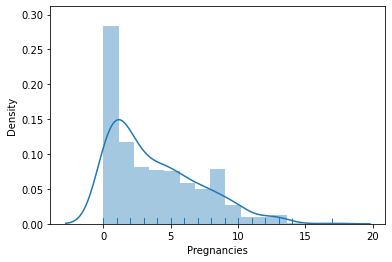

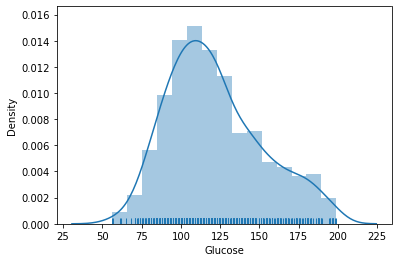

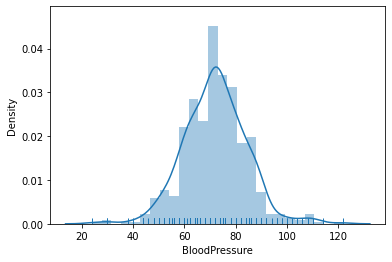

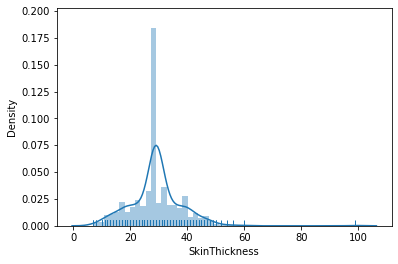

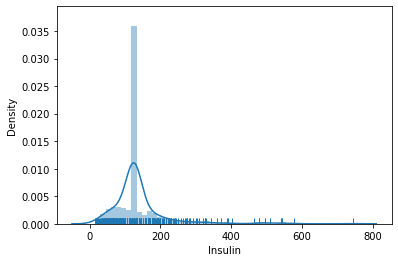

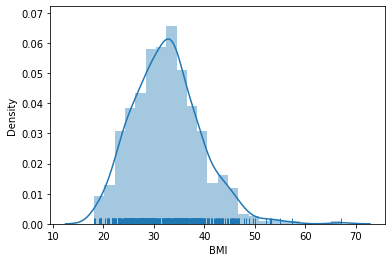

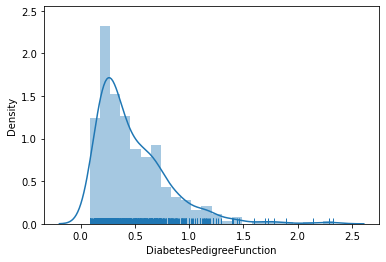

In [ ]:
# histogram plot of the frquency of our feature data columns after cleanup

for j, col in enumerate(X_train.columns[:-1]):
  plt.figure(j)
  sns.distplot(X_train[col], rug = True)

Also, we can still see the correlattion between skin thickness and BMI, and slight correlation between Diabetes Pedigree Function and Age, Insulin and Age, and and Pregnancy and Age, like before 

In [ ]:
X_train.corr() # changed to X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.146497,0.208940,0.098669,0.082083,0.013064,-0.061516,0.523782
Glucose,0.146497,1.000000,0.224920,0.212095,0.447024,0.215129,0.129520,0.297630
BloodPressure,0.208940,0.224920,1.000000,0.166124,0.090943,0.267448,-0.010241,0.323539
SkinThickness,0.098669,0.212095,0.166124,1.000000,0.209512,0.524177,0.099118,0.141905
Insulin,0.082083,0.447024,0.090943,0.209512,1.000000,0.185880,0.195569,0.136164
BMI,0.013064,0.215129,0.267448,0.524177,0.185880,1.000000,0.158615,0.021726
DiabetesPedigreeFunction,-0.061516,0.129520,-0.010241,0.099118,0.195569,0.158615,1.000000,0.019768
Age,0.523782,0.297630,0.323539,0.141905,0.136164,0.021726,0.019768,1.000000


The correlation with glucose and outcome is evident, but also there is a good correlation between BMI and outcome. 

We also see a strong correlation between skin thickness and BMI, as also between Age and Pregnancies. 

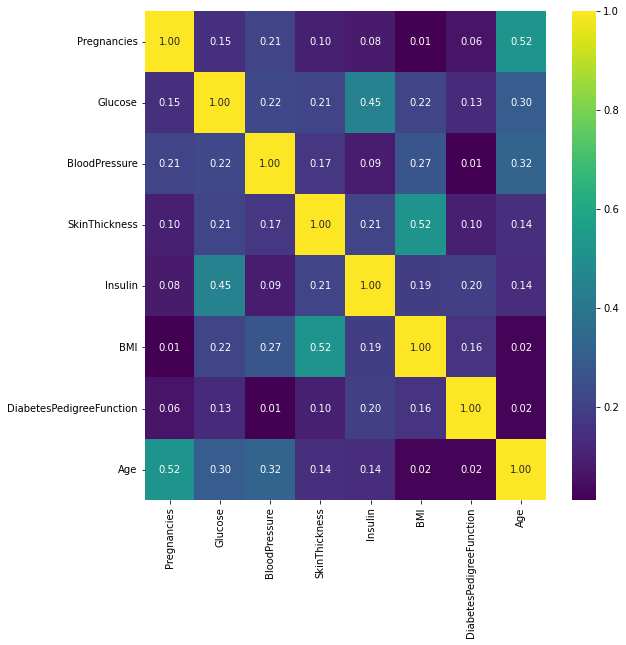

In [ ]:
# heatmap for cleaned data to visualize correlattion 

plt.figure(figsize=(9,9))
sns.heatmap(np.abs(X_train.corr()), annot = True, cmap = 'viridis', fmt = '.2f') # changed to X_train



0    375
1    201
Name: Outcome, dtype: int64


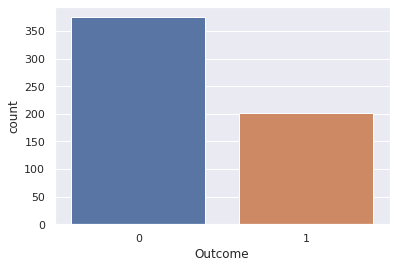

In [ ]:
# Investigating the distribution of our y variable, outcome 

sns.set_theme(style="darkgrid")

sns.countplot(y_train) 

print(y_train.value_counts())

We can see that there is a bias in the data where the count of patients with no diabetes is almost double the count of patients with diabetes 

**Feature Selection** 

In [ ]:
# applying decision treee classifier for feature selection 

from sklearn.feature_selection import SelectFromModel

clf = DecisionTreeClassifier(criterion='entropy', random_state=15, max_depth=10)
clf.fit(X_train, y_train)

trans = SelectFromModel(clf, threshold='median')

X_trans = trans.fit_transform(X_train, y_train)

print("Now the data contains " + str(X_trans.shape[0]) + " training examples of " + str(X_trans.shape[1]) + " dimensions each.")

Now the data contains 576 training examples of 4 dimensions each.


In [ ]:
# putting the selected features in the data frame 

#s_X = pd.DataFrame(X_trans)

#s_X.head()

X_trans

array([[121.   ,  39.   ,   0.261,  28.   ],
       [ 88.   ,  35.3  ,   0.378,  48.   ],
       [108.   ,  35.5  ,   0.415,  24.   ],
       ...,
       [ 97.   ,  38.1  ,   0.218,  30.   ],
       [156.   ,  34.3  ,   1.189,  42.   ],
       [144.   ,  29.5  ,   0.287,  37.   ]])

Here, we can see the features that were selected by our classifier are Glucose, Insulin, BMI, and Diabetes Pedigree Function

In [ ]:
# looking at the features that were given importance by our classifier 

importance = clf.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03343
Feature: 1, Score: 0.29631
Feature: 2, Score: 0.08313
Feature: 3, Score: 0.03504
Feature: 4, Score: 0.11691
Feature: 5, Score: 0.18626
Feature: 6, Score: 0.12351
Feature: 7, Score: 0.12540


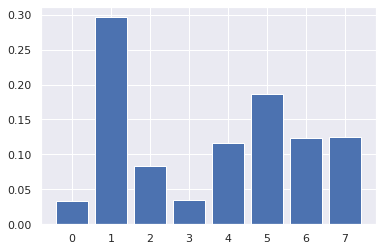

In [ ]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

From this, we can guage that feature Glucose and BMI have more importance in our classifier. And, Skin Thickness was the least important feature. 

**Feature Scaling**

In [ ]:
# feature scaling using standardisation 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_X_train =  pd.DataFrame(scaler.fit_transform(X_train),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

sc_X_test = pd.DataFrame(scaler.transform(X_test),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
sc_X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.855471,-0.020332,0.485922,1.124727,-0.803010,0.954494,-0.658457,-0.466486
1,2.467805,-1.116879,0.159415,1.238125,-1.057352,0.405181,-0.306999,1.218656
2,-0.855471,-0.452305,-0.983357,1.918513,0.519569,0.434873,-0.195854,-0.803514
3,-1.157587,-0.551991,1.465441,-0.009253,-0.154438,-0.441059,-0.850708,1.050142
4,-0.855471,-0.153247,-0.983357,-0.689641,-0.396063,0.182486,-0.042655,-0.550743


In [ ]:
sc_X_train.shape , sc_X_test.shape

((576, 8), (192, 8))

**PCA**

In [ ]:
# importing PCA

from sklearn.decomposition import PCA 

# reducing the dimensions to 2 

pca = PCA(n_components=2)

pca_sc_X_train = pca.fit_transform(sc_X_train)
pca_sc_X_test = pca.transform(sc_X_test)

In [ ]:
pca_sc_X_train.shape , pca_sc_X_test.shape

((576, 2), (192, 2))

In [ ]:
# looking at our scaled data  

pca_sc_X_train

array([[ 0.12507227,  0.9464944 ],
       [ 0.98614649, -1.8010407 ],
       [-0.05271609,  1.82680768],
       ...,
       [-0.18153284,  1.01418314],
       [ 2.11190797, -0.50101437],
       [-0.25318086, -0.34753925]])

In [ ]:
pca.explained_variance_ratio_

array([0.29277304, 0.18534562])

As we can see the first component is capturing only 28% of information and the second compent is capturing 18% of the information. Together, the two principal components provide 47.21% of information only. 

# Model 

We plan to use the following models 
1. KNN classifier  
2. Decision Tree 
3. Logistic regression

Evaluation methods used are 
1. Test/Train split 
2. K-Fold Cross validation 

Pre- processing:
1. PCA 
2. Feature selected 

Hyper parameter tuning: 
1. KNN - find n or neighbors 
2. Decision Tree - GridSearchCV
3. Logistic regression - GridSearchCV

**Unscaled dataset**

In [ ]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
751,1,121.0,78.0,39.0,74.0,39.0,0.261,28
358,12,88.0,74.0,40.0,54.0,35.3,0.378,48
718,1,108.0,60.0,46.0,178.0,35.5,0.415,24
536,0,105.0,90.0,29.0,125.0,29.6,0.197,46
651,1,117.0,60.0,23.0,106.0,33.8,0.466,27


**Scaled Dataset**

In [ ]:
# checking to see we are using the scaled data 

sc_X_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.855471,-0.020332,0.485922,1.124727,-0.803010,0.954494,-0.658457,-0.466486
1,2.467805,-1.116879,0.159415,1.238125,-1.057352,0.405181,-0.306999,1.218656
2,-0.855471,-0.452305,-0.983357,1.918513,0.519569,0.434873,-0.195854,-0.803514
3,-1.157587,-0.551991,1.465441,-0.009253,-0.154438,-0.441059,-0.850708,1.050142
4,-0.855471,-0.153247,-0.983357,-0.689641,-0.396063,0.182486,-0.042655,-0.550743


In [ ]:
y_train

751    0
358    0
718    0
536    0
651    0
      ..
676    1
113    0
556    0
152    1
107    0
Name: Outcome, Length: 576, dtype: int64

#Initial Modelling

In [ ]:
# running all our models with the scaled dataset using the train/test split method 

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))

names = []
scores = []

for name, model in models:
    model.fit(sc_X_train, y_train)
    y_pred = model.predict(sc_X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.729167
1   LR  0.723958
2   DT  0.703125


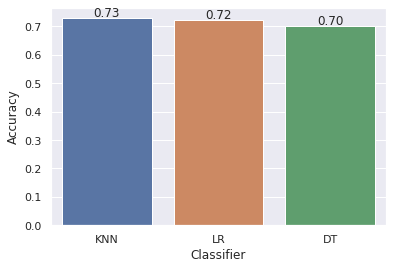

In [ ]:
# bar plot for the comparison of the models for the train/test split method 

axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.2f}'.format(height), ha="center") 
    
plt.show()

**K-Fold Cross validation on the scaled dataset**

In [ ]:
# running k-fold cross validation scores for the selected models 

from sklearn.model_selection import KFold
names = []
scores = []
for name, model in models:
    kfold = KFold(n_splits=10) 
    score = cross_val_score(model, sc_X_train, y_train, cv=kfold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.755445
1   LR  0.784876
2   DT  0.673624


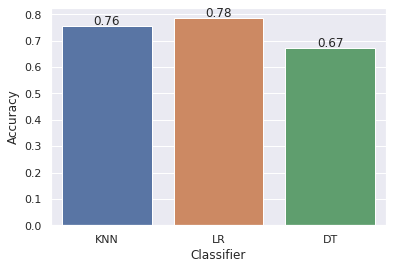

In [ ]:
# bar plot for the comparison of the above model

axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.2f}'.format(height), ha="center") 
    
plt.show()

In [ ]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Non Diabetic', 'Diabetic'], yticklabels=['Non Diabetic', 'Diabetic'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#Hyperparameter tuning 

###Decision Tree

In [ ]:
### Grid search and best model

# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

scorer = 'f1'

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(sc_X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(sc_X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=25, random_state=42)

Train Result

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       375
           1       0.74      0.67      0.70       201

    accuracy                           0.80       576
   macro avg       0.78      0.77      0.78       576
weighted avg       0.80      0.80      0.80       576



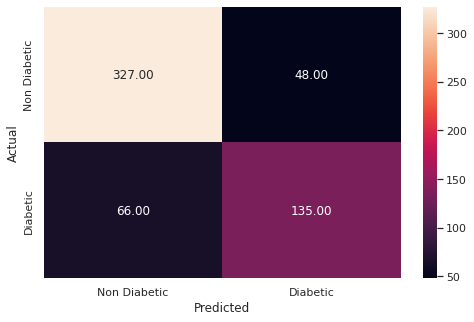

In [ ]:
# train result

print('Train Result\n')
predicted = d_tree_tuned.predict(sc_X_train)
actual = y_train
metrics_score(actual, predicted)

Test Result

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       125
           1       0.64      0.57      0.60        67

    accuracy                           0.74       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.74      0.74       192



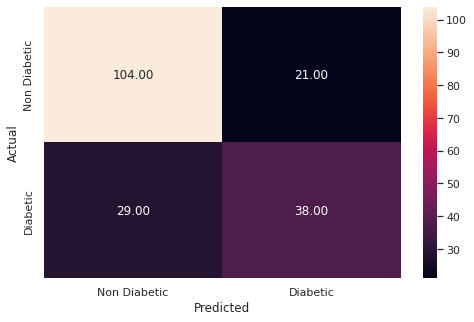

In [ ]:
# test result

print('Test Result\n')
predicted = d_tree_tuned.predict(sc_X_test)
actual = y_test
metrics_score(actual, predicted)

### KNN

In [ ]:
### Grid search and best model

# Choose the type of classifier 
knn_tuned = KNeighborsClassifier()

# Grid of parameters to choose from
parameters = {'n_neighbors': np.arange(2,10)
             }

scorer = 'f1'

# Run the grid search
grid_obj = GridSearchCV(knn_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(sc_X_train, y_train)

# Set the classifier to the best combination of parameters
knn_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
knn_tuned.fit(sc_X_train, y_train)

KNeighborsClassifier()

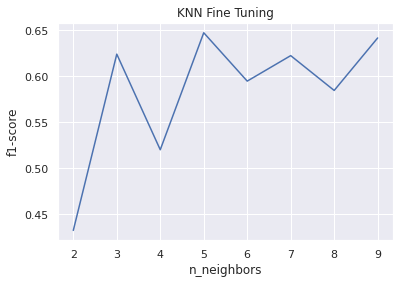

In [ ]:
scores = grid_obj.cv_results_['mean_test_score']
plt.title('KNN Fine Tuning')
plt.xlabel('n_neighbors')
plt.ylabel('f1-score')
plt.plot(parameters['n_neighbors'] , scores);

Train Result

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       375
           1       0.78      0.73      0.76       201

    accuracy                           0.84       576
   macro avg       0.82      0.81      0.82       576
weighted avg       0.83      0.84      0.83       576



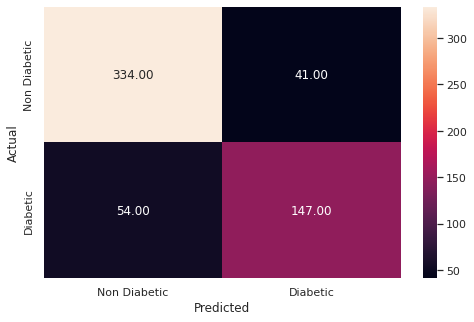

In [ ]:
# train result

print('Train Result\n')
predicted = knn_tuned.predict(sc_X_train)
actual = y_train
metrics_score(actual, predicted)

Test Result

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       125
           1       0.63      0.55      0.59        67

    accuracy                           0.73       192
   macro avg       0.70      0.69      0.69       192
weighted avg       0.72      0.73      0.72       192



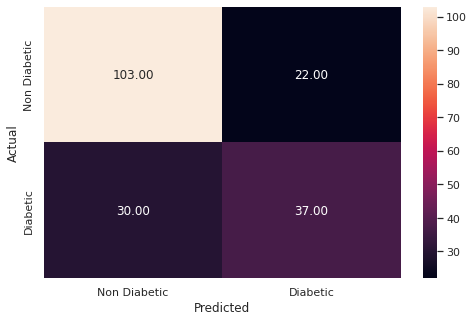

In [ ]:
# test result

print('Test Result\n')
predicted = knn_tuned.predict(sc_X_test)
actual = y_test
metrics_score(actual, predicted)

### Logistic Regression

In [ ]:
### Grid search and best model

# Choose the type of classifier 
lr_tuned = LogisticRegression()

# Grid of parameters to choose from
parameters = {'C': [0.0001,0.001,0.01,0.1,1]
             }

scorer = 'f1'

# Run the grid search
grid_obj = GridSearchCV(lr_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(sc_X_train, y_train)

# Set the classifier to the best combination of parameters
lr_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
lr_tuned.fit(sc_X_train, y_train)

LogisticRegression(C=0.1)

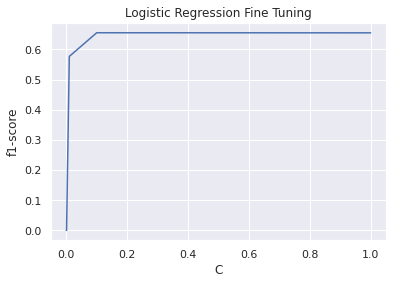

In [ ]:
scores = grid_obj.cv_results_['mean_test_score']
plt.title('Logistic Regression Fine Tuning')
plt.xlabel('C')
plt.ylabel('f1-score')
plt.plot(parameters['C'] , scores);

Train Result

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       375
           1       0.76      0.59      0.66       201

    accuracy                           0.79       576
   macro avg       0.78      0.74      0.75       576
weighted avg       0.79      0.79      0.78       576



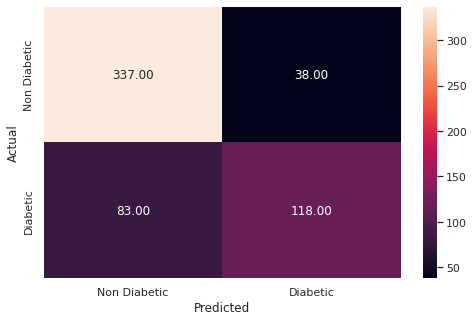

In [ ]:
# train result

print('Train Result\n')
predicted = lr_tuned.predict(sc_X_train)
actual = y_train
metrics_score(actual, predicted)

Test Result

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       125
           1       0.64      0.52      0.57        67

    accuracy                           0.73       192
   macro avg       0.70      0.68      0.69       192
weighted avg       0.72      0.73      0.72       192



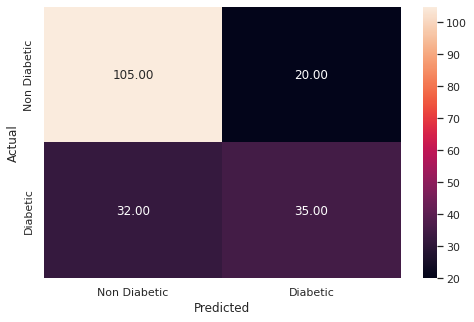

In [ ]:
# test result

print('Test Result\n')
predicted = lr_tuned.predict(sc_X_test)
actual = y_test
metrics_score(actual, predicted)

In [ ]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

In [ ]:
def create_result_data_frame(model_list):
    train_results = []
    test_results = []
    for model in model_list:
        
        #accuracy
        train_accracy = accuracy_score(y_train , model.predict(sc_X_train))
        test_accracy = accuracy_score(y_test , model.predict(sc_X_test))
        
        #precision
        train_p = precision_score(y_train , model.predict(sc_X_train))
        test_p = precision_score(y_test , model.predict(sc_X_test))
        
        #recall
        train_r = recall_score(y_train , model.predict(sc_X_train))
        test_r = recall_score(y_test , model.predict(sc_X_test))
        
        #f1_score
        train_f = f1_score(y_train , model.predict(sc_X_train) , average='weighted')
        test_f = f1_score(y_test , model.predict(sc_X_test) , average='weighted')

        # creating result dictionary
        temp_result_train = {
            'model' : model,
            'accuracy' : train_accracy,
            'precision' : train_p,
            'recall' : train_r,
            'f1_score' : train_f
        }
        
        temp_result_test = {
            'model' : model,
            'accuracy' : test_accracy,
            'precision' : test_p,
            'recall' : test_r,
            'f1_score' : test_f
        }
        
        train_results.append(temp_result_train)
        test_results.append(temp_result_test)
        
    return train_results ,test_results
        

In [ ]:
model_list = [knn_tuned , lr_tuned , d_tree_tuned]

train_results ,test_results = create_result_data_frame(model_list)

In [ ]:
train_result_df = pd.DataFrame(train_results)
train_result_df

,model,accuracy,precision,recall,f1_score
0,KNeighborsClassifier(),0.835069,0.781915,0.731343,0.833719
1,LogisticRegression(C=0.1),0.789931,0.756410,0.587065,0.782636
2,"DecisionTreeClassifier(max_depth=4, min_sample...",0.802083,0.737705,0.671642,0.799764


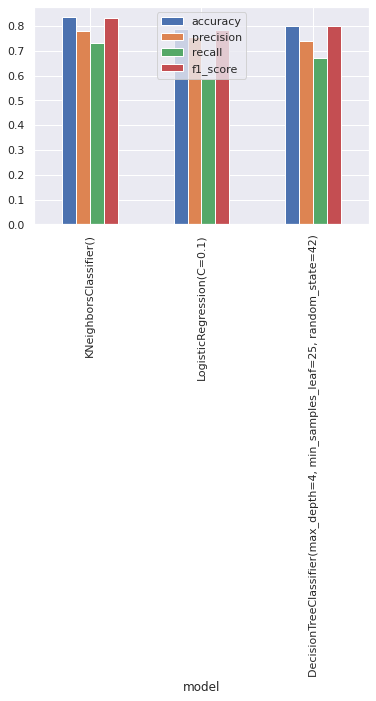

In [ ]:
train_result_df.set_index('model').plot(rot = 90 , kind = 'bar')

In [ ]:
test_result_df = pd.DataFrame(test_results)
test_result_df

,model,accuracy,precision,recall,f1_score
0,KNeighborsClassifier(),0.729167,0.627119,0.552239,0.724768
1,LogisticRegression(C=0.1),0.729167,0.636364,0.522388,0.722049
2,"DecisionTreeClassifier(max_depth=4, min_sample...",0.739583,0.644068,0.567164,0.735354


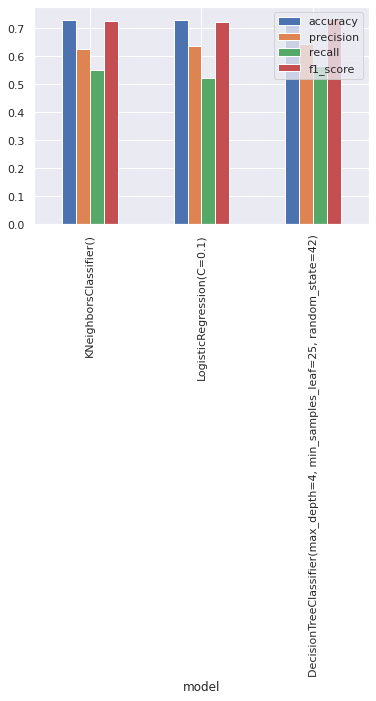

In [ ]:
test_result_df.set_index('model').plot(rot = 90 , kind = 'bar')

### Checking the performance of Fine tuned model on PCA data

### Logistic Regression

In [ ]:
### Grid search and best model

# Choose the type of classifier 
lr_tuned = LogisticRegression()

# Grid of parameters to choose from
parameters = {'C': [0.0001,0.001,0.01,0.1,1]
             }

scorer = 'f1'

# Run the grid search
grid_obj = GridSearchCV(lr_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(pca_sc_X_train, y_train)

# Set the classifier to the best combination of parameters
lr_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
lr_tuned.fit(pca_sc_X_train, y_train)

LogisticRegression(C=1)

Test Result

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       125
           1       0.62      0.54      0.58        67

    accuracy                           0.72       192
   macro avg       0.69      0.68      0.69       192
weighted avg       0.72      0.72      0.72       192



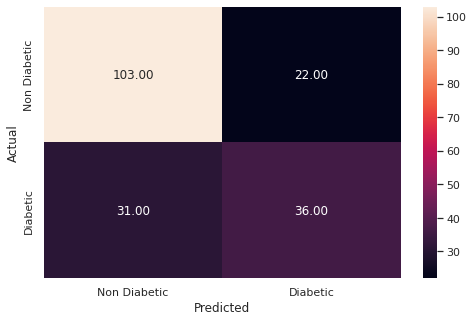

In [ ]:
# test result

print('Test Result\n')
predicted = lr_tuned.predict(pca_sc_X_test)
actual = y_test
metrics_score(actual, predicted)

### KNN

In [ ]:
### Grid search and best model

# Choose the type of classifier 
knn_tuned = KNeighborsClassifier()

# Grid of parameters to choose from
parameters = {'n_neighbors': np.arange(2,10)
             }

scorer = 'f1'

# Run the grid search
grid_obj = GridSearchCV(knn_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(pca_sc_X_train, y_train)

# Set the classifier to the best combination of parameters
knn_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
knn_tuned.fit(pca_sc_X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

Test Result

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       125
           1       0.52      0.48      0.50        67

    accuracy                           0.67       192
   macro avg       0.63      0.62      0.62       192
weighted avg       0.66      0.67      0.66       192



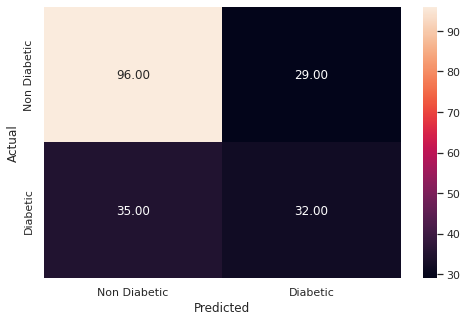

In [ ]:
# test result

print('Test Result\n')
predicted = knn_tuned.predict(pca_sc_X_test)
actual = y_test
metrics_score(actual, predicted)

###Decision Tree

In [ ]:
### Grid search and best model

# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

scorer = 'f1'

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(pca_sc_X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(pca_sc_X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=42)

Test Result

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       125
           1       0.56      0.67      0.61        67

    accuracy                           0.70       192
   macro avg       0.68      0.69      0.68       192
weighted avg       0.72      0.70      0.70       192



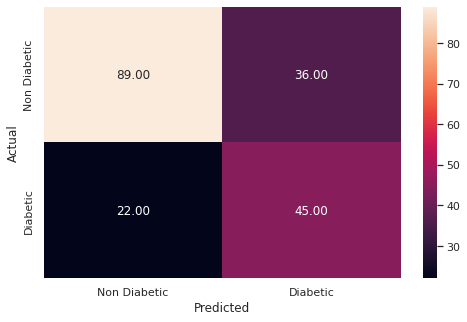

In [ ]:
# test result

print('Test Result\n')
predicted = d_tree_tuned.predict(pca_sc_X_test)
actual = y_test
metrics_score(actual, predicted)